## Basking Automation - Take home assignment
### Author : Sagar Bhavsar (bhvsagar@gmail.com)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import seaborn as sns
import datetime as dt
import re
%matplotlib inline

pd.options.display.max_colwidth = 800
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Matplotlib is building the font cache; this may take a moment.


In [135]:
df = pd.read_csv('basking_data.csv')
df.shape
df.head()

(23647, 2)

,employee_id,observed_in_office_timestamp
0,123,2022-01-02 12:00:00.000000
1,123,2022-01-02 13:00:00.000000
2,91,2022-01-02 13:00:00.000000
3,123,2022-01-02 14:00:00.000000
4,123,2022-01-02 15:00:00.000000


In [136]:
df.dtypes

employee_id                      int64
observed_in_office_timestamp    object
dtype: object

In [137]:
df.observed_in_office_timestamp = pd.to_datetime(df.observed_in_office_timestamp)

In [138]:
df.dtypes

employee_id                              int64
observed_in_office_timestamp    datetime64[ns]
dtype: object

In [139]:
df.head()

,employee_id,observed_in_office_timestamp
0,123,2022-01-02 12:00:00
1,123,2022-01-02 13:00:00
2,91,2022-01-02 13:00:00
3,123,2022-01-02 14:00:00
4,123,2022-01-02 15:00:00


In [140]:
df['date'] = df.observed_in_office_timestamp.dt.date

In [141]:
df['time'] = df.observed_in_office_timestamp.dt.time

In [142]:
df.head()

,employee_id,observed_in_office_timestamp,date,time
0,123,2022-01-02 12:00:00,2022-01-02,12:00:00
1,123,2022-01-02 13:00:00,2022-01-02,13:00:00
2,91,2022-01-02 13:00:00,2022-01-02,13:00:00
3,123,2022-01-02 14:00:00,2022-01-02,14:00:00
4,123,2022-01-02 15:00:00,2022-01-02,15:00:00


In [143]:
df.time.unique()

array([datetime.time(12, 0), datetime.time(13, 0), datetime.time(14, 0),
       datetime.time(15, 0), datetime.time(16, 0), datetime.time(10, 0),
       datetime.time(11, 0), datetime.time(17, 0), datetime.time(8, 0),
       datetime.time(9, 0), datetime.time(18, 0), datetime.time(19, 0),
       datetime.time(20, 0), datetime.time(21, 0), datetime.time(22, 0),
       datetime.time(1, 0), datetime.time(2, 0), datetime.time(3, 0),
       datetime.time(4, 0), datetime.time(5, 0), datetime.time(6, 0),
       datetime.time(7, 0), datetime.time(23, 0), datetime.time(0, 0)],
      dtype=object)

In [144]:
df.sort_values(by = ['date','time'])

,employee_id,observed_in_office_timestamp,date,time
0,123,2022-01-02 12:00:00,2022-01-02,12:00:00
1,123,2022-01-02 13:00:00,2022-01-02,13:00:00
2,91,2022-01-02 13:00:00,2022-01-02,13:00:00
3,123,2022-01-02 14:00:00,2022-01-02,14:00:00
4,123,2022-01-02 15:00:00,2022-01-02,15:00:00
...,...,...,...,...
23642,77,2022-03-30 20:00:00,2022-03-30,20:00:00
23643,34,2022-03-30 20:00:00,2022-03-30,20:00:00
23644,260,2022-03-30 20:00:00,2022-03-30,20:00:00
23645,106,2022-03-30 20:00:00,2022-03-30,20:00:00


In [528]:
len(df.employee_id.unique())

268

In [145]:
df.head()

,employee_id,observed_in_office_timestamp,date,time
0,123,2022-01-02 12:00:00,2022-01-02,12:00:00
1,123,2022-01-02 13:00:00,2022-01-02,13:00:00
2,91,2022-01-02 13:00:00,2022-01-02,13:00:00
3,123,2022-01-02 14:00:00,2022-01-02,14:00:00
4,123,2022-01-02 15:00:00,2022-01-02,15:00:00


In [146]:
# Cheking for null values
df.isna().sum()

employee_id                     0
observed_in_office_timestamp    0
date                            0
time                            0
dtype: int64

In [147]:
# Checking for duplicates rows

In [148]:
df.drop_duplicates().shape

(23647, 4)

##### Note : There are no duplicate rows

In [149]:
# feature engineering

In [156]:
# df['year'] = pd.DatetimeIndex(df['date']).year
df['mnth'] = ['1. Jan' if x == 1 else '2. Feb' if x == 2 else '3. Mar' for x in pd.DatetimeIndex(df['date']).month]
df['day'] = pd.DatetimeIndex(df['date']).day
df['yymmdd'] = [int(re.sub(r'-','',str(x))) for x in df['date']]
df['yymm'] = [int(str(x)[:6]) for x in df['yymmdd']]
df['mmdd'] = [int(str(x)[4:]) for x in df['yymmdd']]
df['weekday'] = df['observed_in_office_timestamp'].dt.day_name()
df['weekday'] = [x[:3] for x in df['weekday']]
df['time_of_day'] = [str(x)[:2] for x in df['time']]
df['wom'] = df['date'].apply(lambda d: (d.day-1) // 7 + 1)
df.head()

,employee_id,observed_in_office_timestamp,date,time,mnth,day,yymmdd,yymm,mmdd,weekday,time_of_day,wom
0,123,2022-01-02 12:00:00,2022-01-02,12:00:00,1. Jan,2,20220102,202201,102,Sun,12,1
1,123,2022-01-02 13:00:00,2022-01-02,13:00:00,1. Jan,2,20220102,202201,102,Sun,13,1
2,91,2022-01-02 13:00:00,2022-01-02,13:00:00,1. Jan,2,20220102,202201,102,Sun,13,1
3,123,2022-01-02 14:00:00,2022-01-02,14:00:00,1. Jan,2,20220102,202201,102,Sun,14,1
4,123,2022-01-02 15:00:00,2022-01-02,15:00:00,1. Jan,2,20220102,202201,102,Sun,15,1


In [157]:
df['yymm'].value_counts()

202203    10138
202202     7982
202201     5527
Name: yymm, dtype: int64

### Total Employees visited to office each month

In [158]:
df.groupby(['mnth']).agg({'employee_id':pd.Series.nunique})

,employee_id
mnth,
1. Jan,146
2. Feb,172
3. Mar,212


In [159]:
df.sort_values(by =['observed_in_office_timestamp']).head(20)

,employee_id,observed_in_office_timestamp,date,time,mnth,day,yymmdd,yymm,mmdd,weekday,time_of_day,wom
0,123,2022-01-02 12:00:00,2022-01-02,12:00:00,1. Jan,2,20220102,202201,102,Sun,12,1
1,123,2022-01-02 13:00:00,2022-01-02,13:00:00,1. Jan,2,20220102,202201,102,Sun,13,1
2,91,2022-01-02 13:00:00,2022-01-02,13:00:00,1. Jan,2,20220102,202201,102,Sun,13,1
3,123,2022-01-02 14:00:00,2022-01-02,14:00:00,1. Jan,2,20220102,202201,102,Sun,14,1
4,123,2022-01-02 15:00:00,2022-01-02,15:00:00,1. Jan,2,20220102,202201,102,Sun,15,1
5,123,2022-01-02 16:00:00,2022-01-02,16:00:00,1. Jan,2,20220102,202201,102,Sun,16,1
6,91,2022-01-02 16:00:00,2022-01-02,16:00:00,1. Jan,2,20220102,202201,102,Sun,16,1
7,72,2022-01-03 10:00:00,2022-01-03,10:00:00,1. Jan,3,20220103,202201,103,Mon,10,1
8,121,2022-01-03 10:00:00,2022-01-03,10:00:00,1. Jan,3,20220103,202201,103,Mon,10,1
9,72,2022-01-03 11:00:00,2022-01-03,11:00:00,1. Jan,3,20220103,202201,103,Mon,11,1


### Filtering : Removing weekends

In [165]:
df_wkend = df[df['weekday'].isin(['Sun','Sat'])].groupby(['mnth','date']).agg({'employee_id':pd.Series.nunique})

In [26]:
# Average number of employees present in office on weekends in each month

In [166]:
df_wkend.groupby(['mnth']).agg({'employee_id':np.mean})

,employee_id
mnth,
1. Jan,1.375000
2. Feb,2.666667
3. Mar,2.600000


###### Note : Average of total employee presence on weekends is minimal hence, weekends can be excluded from analysis

In [168]:
# Removing weekends from data
df_wkd = df[~df['weekday'].isin(['Sun','Sat'])]
df_wkd.shape

(23502, 12)

### Aggregating at datetime level, with measure as - distinct count of employee_ids in that hour

In [221]:
df_hr_agg = df_wkd.groupby(['observed_in_office_timestamp','date','time','mnth','day', \
                        'yymmdd','yymm','mmdd','wom','weekday','time_of_day']).agg({'employee_id':'count'})
df_hr_agg.shape

(1029, 1)

In [222]:
df_hr_agg.reset_index(inplace = True)

In [223]:
df_hr_agg.rename({'employee_id':'util'}, axis = 1, inplace = True)

In [224]:
df_hr_agg.head()

,observed_in_office_timestamp,date,time,mnth,day,yymmdd,yymm,mmdd,wom,weekday,time_of_day,util
0,2022-01-03 10:00:00,2022-01-03,10:00:00,1. Jan,3,20220103,202201,103,1,Mon,10,2
1,2022-01-03 11:00:00,2022-01-03,11:00:00,1. Jan,3,20220103,202201,103,1,Mon,11,2
2,2022-01-03 12:00:00,2022-01-03,12:00:00,1. Jan,3,20220103,202201,103,1,Mon,12,3
3,2022-01-03 13:00:00,2022-01-03,13:00:00,1. Jan,3,20220103,202201,103,1,Mon,13,6
4,2022-01-03 14:00:00,2022-01-03,14:00:00,1. Jan,3,20220103,202201,103,1,Mon,14,5


In [225]:
df_hr_agg.to_excel('df_hr_agg.xlsx')

In [226]:
df_hr_agg.to_pickle('df_hr_agg.pkl')

In [200]:
df_hr_agg.time_of_day.dtypes

dtype('O')

In [201]:
df_hr_agg.time_of_day.unique()

array(['10', '11', '12', '13', '14', '15', '16', '17', '08', '09', '18',
       '19', '20', '21', '22', '01', '02', '03', '04', '05', '06', '07',
       '23', '00'], dtype=object)

### Which is the busiest hour in each month

In [199]:
df_hr_agg.groupby(['mnth','time_of_day']).agg({'util':np.mean}).rename({'util':'Avg_util'}, axis = 1).reset_index()

,mnth,time_of_day,Avg_util
0,1. Jan,00,1.857143
1,1. Jan,01,1.777778
2,1. Jan,02,1.888889
3,1. Jan,03,2.500000
4,1. Jan,04,2.000000
5,1. Jan,05,1.750000
6,1. Jan,06,2.000000
7,1. Jan,07,2.000000
8,1. Jan,08,3.157895
9,1. Jan,09,15.500000


/Users/sagarbhavsar/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


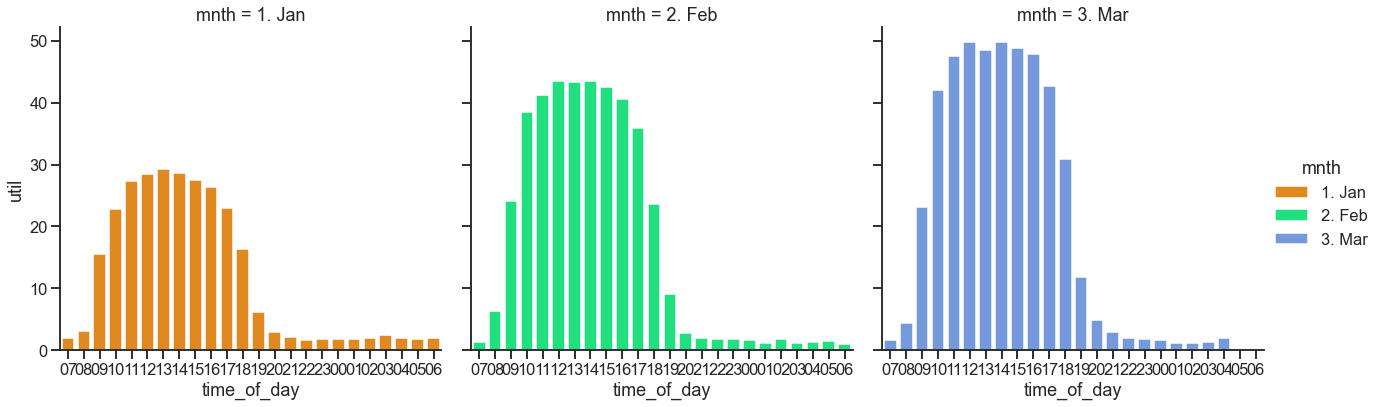

In [532]:
sns.FacetGrid(df_hr_agg, size=6,  col = "mnth", hue = 'mnth', \
              palette = ['darkorange','springgreen','cornflowerblue']) \
   .map(sns.barplot,"time_of_day","util", ci = None, order=['07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17','18',
       '19', '20', '21', '22', '23','00', '01', '02', '03', '04', '05', '06']) \
   .add_legend()
# plt.figure(figsize = (15,10))
plt.show()
# palette = ['darkorange','springgreen','cornflowerblue'])

In [533]:
df_hr_agg['time_of_day'] = ['24' if x == '00' else x for x in df_hr_agg['time_of_day']]

In [534]:
df_hr_agg['time_of_day_bkt'] = ['7 to 9' if int(x) > 6 and int(x) <= 9 else \
                                '9 to 12' if int(x) > 9 and int(x) <= 12 else \
                                '12 to 15' if int(x) > 12 and int(x) <= 15 else \
                                '15 to 18' if int(x) > 15 and int(x) <= 18 else \
                                '18 to 20' if int(x) > 18 and int(x) <= 20 else \
                                '20 to 00' if int(x) > 20 and int(x) <= 24 else \
                                '00 to 6' if int(x) > 0 and int(x) <= 6 else x for x in df_hr_agg['time_of_day']]
df_hr_agg.shape

(1029, 13)

In [535]:
df_hr_agg['time_of_day_bkt'].value_counts()

12 to 15    189
15 to 18    188
9 to 12     188
20 to 00    144
7 to 9      133
18 to 20    111
00 to 6      76
Name: time_of_day_bkt, dtype: int64

In [536]:
df_hr_agg.head()

,observed_in_office_timestamp,date,time,mnth,day,yymmdd,yymm,mmdd,wom,weekday,time_of_day,util,time_of_day_bkt
0,2022-01-03 10:00:00,2022-01-03,10:00:00,1. Jan,3,20220103,202201,103,1,Mon,10,2,9 to 12
1,2022-01-03 11:00:00,2022-01-03,11:00:00,1. Jan,3,20220103,202201,103,1,Mon,11,2,9 to 12
2,2022-01-03 12:00:00,2022-01-03,12:00:00,1. Jan,3,20220103,202201,103,1,Mon,12,3,9 to 12
3,2022-01-03 13:00:00,2022-01-03,13:00:00,1. Jan,3,20220103,202201,103,1,Mon,13,6,12 to 15
4,2022-01-03 14:00:00,2022-01-03,14:00:00,1. Jan,3,20220103,202201,103,1,Mon,14,5,12 to 15


In [537]:
df_hr_agg.groupby(['mnth','time_of_day_bkt']).agg({'util':np.mean}).rename({'util':'Avg_util'}, axis = 1).reset_index()

,mnth,time_of_day_bkt,Avg_util
0,1. Jan,00 to 6,1.971429
1,1. Jan,12 to 15,28.523810
2,1. Jan,15 to 18,21.951613
3,1. Jan,18 to 20,4.647059
4,1. Jan,20 to 00,1.863636
5,1. Jan,7 to 9,8.952381
6,1. Jan,9 to 12,26.158730
7,2. Feb,00 to 6,1.391304
8,2. Feb,12 to 15,43.133333
9,2. Feb,15 to 18,33.400000


/Users/sagarbhavsar/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Time of the day wise average utilization')

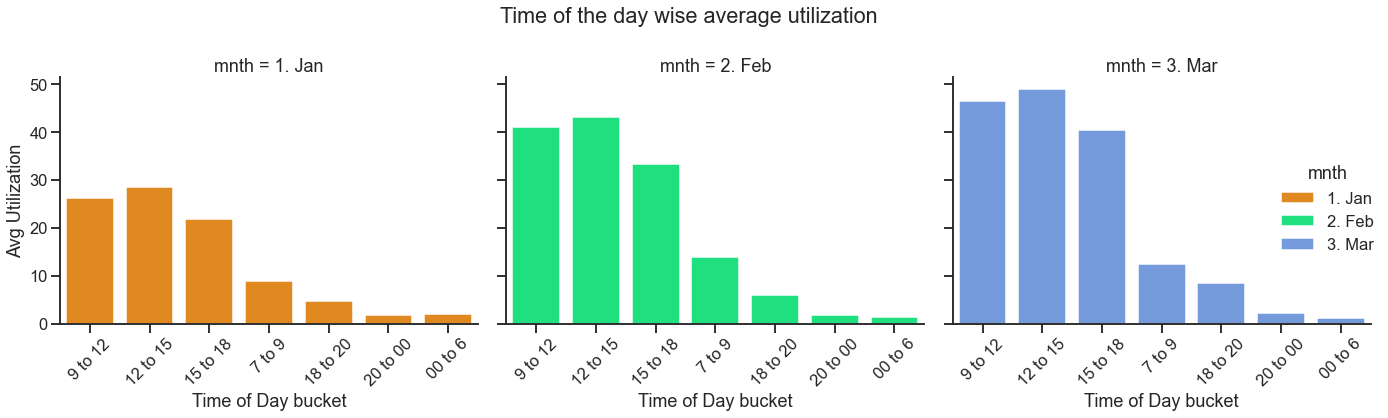

In [561]:
sns.set_context('talk')
g = sns.FacetGrid(df_hr_agg, size = 6, col = "mnth", hue = 'mnth', \
              palette = ['darkorange','springgreen','cornflowerblue']) \
   .map(sns.barplot,"time_of_day_bkt","util", ci = None, order=['9 to 12', '12 to 15', '15 to 18', '7 to 9', '18 to 20','20 to 00', '00 to 6']) \
   .add_legend()

g.set_xlabels('Time of Day bucket')
g.set_ylabels('Avg Utilization')

for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

g.fig.suptitle('Time of the day wise average utilization')
plt.tight_layout()
plt.show()
# palette = ['darkorange','springgreen','cornflowerblue'])

### Aggregating at date level, with measure as - max of util

In [230]:
df_day_agg = df_hr_agg.groupby(['date','mnth','day', \
                        'yymmdd','yymm','mmdd','wom','weekday']).agg({'util':np.max}).rename({'util':'peak_util'}, axis = 1).reset_index()
df_day_agg.shape

(63, 9)

In [ ]:
# We will calculate the Average Peak Occupancy, which represents the average of daily peaks

In [231]:
df_day_agg.head()

,date,mnth,day,yymmdd,yymm,mmdd,wom,weekday,peak_util
0,2022-01-03,1. Jan,3,20220103,202201,103,1,Mon,6
1,2022-01-04,1. Jan,4,20220104,202201,104,1,Tue,28
2,2022-01-05,1. Jan,5,20220105,202201,105,1,Wed,20
3,2022-01-06,1. Jan,6,20220106,202201,106,1,Thu,33
4,2022-01-07,1. Jan,7,20220107,202201,107,1,Fri,19


In [566]:
df_day_agg[['day','mnth','peak_util']]

,day,mnth,peak_util
0,3,1. Jan,6
1,4,1. Jan,28
2,5,1. Jan,20
3,6,1. Jan,33
4,7,1. Jan,19
5,10,1. Jan,36
6,11,1. Jan,29
7,12,1. Jan,36
8,13,1. Jan,31
9,14,1. Jan,27


In [232]:
avg_v_l1 = df_day_agg.groupby(['mnth']).agg({'peak_util':np.mean})['peak_util'].tolist()

<Figure size 1152x504 with 0 Axes>

Text(0.5, 0, 'Day of Month')

Text(0, 0.5, 'Peak Utilization')

Text(0.5, 1.0, 'Day wise peak utilization for each month')

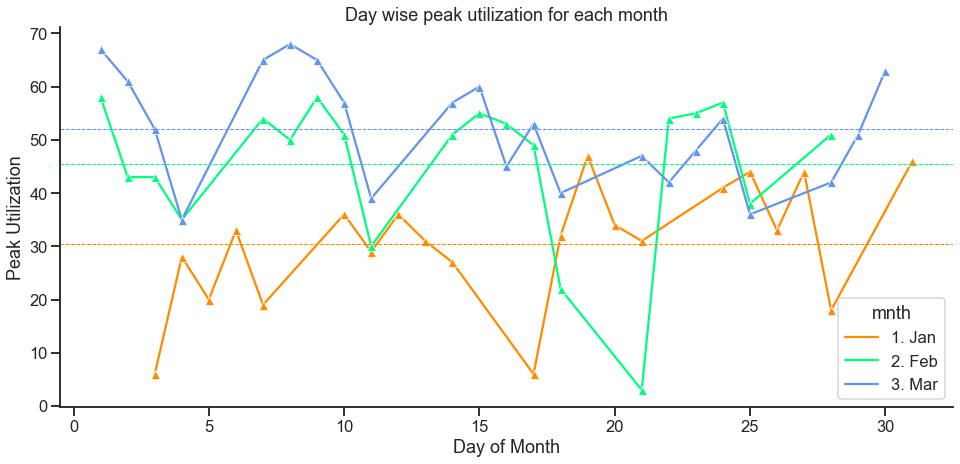

In [565]:
sns.set_context('talk')
sns.set_style('ticks')

# sns.despine(left = True, bottom = True)
plt.figure(figsize = (16,7))
graph = sns.lineplot(data = df_day_agg, x = 'day', y = 'peak_util', hue = 'mnth', marker = '^', \
             palette = ['darkorange','springgreen','cornflowerblue'])
graph.axhline(avg_v_l1[0],color = 'darkorange', linestyle = '--', linewidth = 1)
graph.axhline(avg_v_l1[1],color = 'springgreen',linestyle = '--', linewidth = 1)
graph.axhline(avg_v_l1[2],color = 'cornflowerblue',linestyle = '--', linewidth = 1)

sns.despine(right = True, top = True)

plt.xlabel('Day of Month')
plt.ylabel('Peak Utilization')
plt.title('Day wise peak utilization for each month')
plt.show()

In [ ]:
##### Note : Please observe the cyclic ups & downs of peak utilization each day signifies that on certain days of week 
# utilization goes high and again comes down as weekend approaches, next week the same cycle repeats

In [234]:
# Average of peak value for each month
df_day_agg.groupby(['mnth']).agg({'peak_util':np.mean}).reset_index().rename({'peak_util':'Avg Peak Utilization'}, axis = 1)

,mnth,Avg Peak Utilization
0,1. Jan,30.523810
1,2. Feb,45.500000
2,3. Mar,52.136364


In [323]:
# Max of peak value for each month
df_day_agg.groupby(['mnth']).agg({'peak_util':np.max}).reset_index().rename({'peak_util':'Avg Peak Utilization'}, axis = 1)

,mnth,Avg Peak Utilization
0,1. Jan,47
1,2. Feb,58
2,3. Mar,68


In [235]:
# Average of peak value for each month - barplot

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Avg peak utilization')

Text(0.5, 1.0, 'Average peak Utilization')

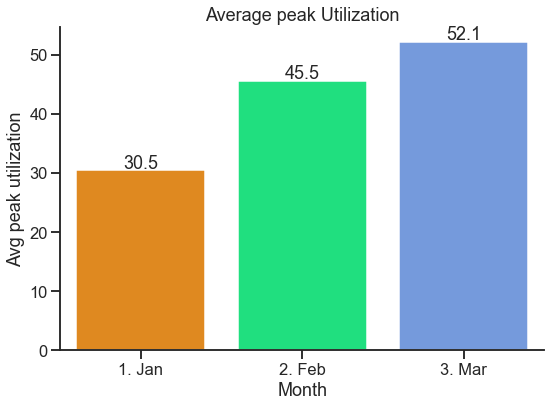

In [575]:
sns.set_context('talk')
plt.figure(figsize = (8,6))
ax = sns.barplot(x = 'mnth', y = 'peak_util', ci = None, data = df_day_agg, palette = ['darkorange','springgreen','cornflowerblue'])
# ax.bar_label(ax.containers[0])
sns.despine(right = True, top = True)
show_values(ax)
plt.xlabel('Month')
plt.ylabel('Avg peak utilization')
plt.title('Average peak Utilization')
plt.tight_layout()
plt.show()

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Standard Deviation')

Text(0.5, 1.0, 'Variation in Peak Utilization for each Month')

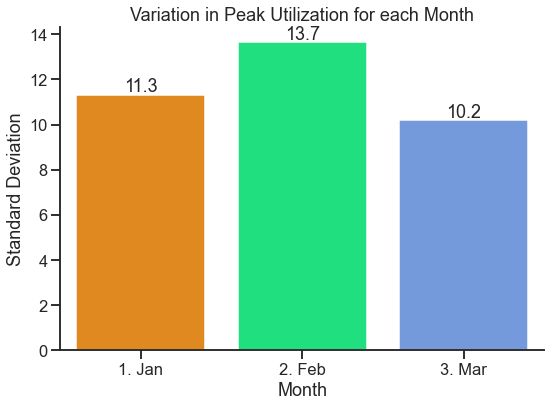

In [574]:
# Checking variation in peak utilization for each month
sns.set_context('talk')
plt.figure(figsize = (8,6))
ax = sns.barplot(x = 'mnth', y = 'peak_util', data = df_day_agg, estimator = np.std, \
            ci = None, palette = ['darkorange','springgreen','cornflowerblue'])
show_values(ax)
sns.despine(right = True, top = True)
plt.xlabel('Month')
plt.ylabel('Standard Deviation')
plt.title('Variation in Peak Utilization for each Month')
plt.tight_layout()
plt.show()

### Average Peak utilization for each day of week of each month

In [238]:
df_day_agg.groupby(['mnth','weekday']).agg({'peak_util':np.mean}).rename({'peak_util':'avg_peak_util'}, axis = 1). \
reset_index()

,mnth,weekday,avg_peak_util
0,1. Jan,Fri,23.75
1,1. Jan,Mon,27.00
2,1. Jan,Thu,35.50
3,1. Jan,Tue,33.25
4,1. Jan,Wed,34.00
5,2. Feb,Fri,31.25
6,2. Feb,Mon,39.75
7,2. Feb,Thu,50.00
8,2. Feb,Tue,54.25
9,2. Feb,Wed,52.25


/Users/sagarbhavsar/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


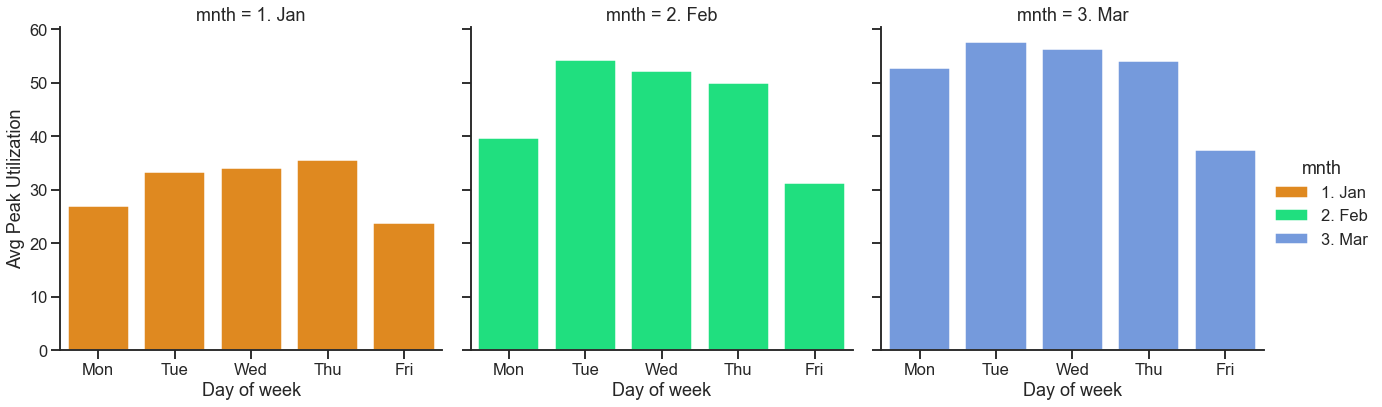

In [600]:
sns.set_context('talk')

h = sns.FacetGrid(df_day_agg, size=6,  col = "mnth", hue = 'mnth', \
              palette = ['darkorange','springgreen','cornflowerblue']) \
   .map(sns.barplot,"weekday","peak_util", ci = None, order=['Mon','Tue','Wed','Thu','Fri']) \
   .add_legend()

h.set_xlabels('Day of week')
h.set_ylabels('Avg Peak Utilization')

# h.fig.suptitle('Popular Day of visit')
# plt.tight_layout()
plt.show()
# palette = ['darkorange','springgreen','cornflowerblue'])

##### Note : In Jan Thursday is the most popular day to visit the office AND in Feb, Mar, Tuesday is the most popular day to visit the office

### Average Peak utilization for each week of each month

In [240]:
df_day_agg.groupby(['mnth','wom']).agg({'peak_util':np.mean}).rename({'peak_util':'avg_peak_util'}, axis = 1). \
reset_index()

,mnth,wom,avg_peak_util
0,1. Jan,1,21.2
1,1. Jan,2,31.8
2,1. Jan,3,30.0
3,1. Jan,4,36.0
4,1. Jan,5,46.0
5,2. Feb,1,46.6
6,2. Feb,2,48.0
7,2. Feb,3,36.4
8,2. Feb,4,51.0
9,3. Mar,1,56.0


/Users/sagarbhavsar/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


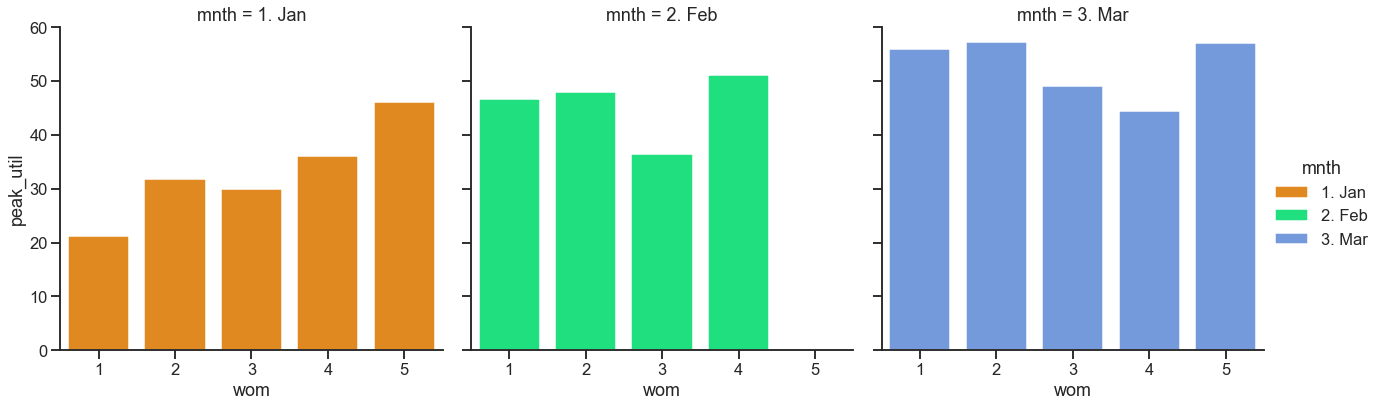

In [242]:
sns.FacetGrid(df_day_agg, size=6,  col = "mnth", hue = 'mnth', \
              palette = ['darkorange','springgreen','cornflowerblue']) \
   .map(sns.barplot,"wom","peak_util", ci = None, order=[1,2,3,4,5]) \
   .add_legend()
# plt.figure(figsize = (15,10))
plt.show()
# palette = ['darkorange','springgreen','cornflowerblue'])

### How many days in a week does employee come to office?

In [620]:
df_wkd.shape
df_wkd.head()

(23502, 12)

,employee_id,observed_in_office_timestamp,date,time,mnth,day,yymmdd,yymm,mmdd,weekday,time_of_day,wom
7,72,2022-01-03 10:00:00,2022-01-03,10:00:00,1. Jan,3,20220103,202201,103,Mon,10,1
8,121,2022-01-03 10:00:00,2022-01-03,10:00:00,1. Jan,3,20220103,202201,103,Mon,10,1
9,72,2022-01-03 11:00:00,2022-01-03,11:00:00,1. Jan,3,20220103,202201,103,Mon,11,1
10,121,2022-01-03 11:00:00,2022-01-03,11:00:00,1. Jan,3,20220103,202201,103,Mon,11,1
11,72,2022-01-03 12:00:00,2022-01-03,12:00:00,1. Jan,3,20220103,202201,103,Mon,12,1


In [624]:
df_wkd[['employee_id','date']].drop_duplicates().shape
df_wkd[df_wkd['mnth'] == '3. Mar'][['employee_id','date']].drop_duplicates().shape

(3076, 2)

(1305, 2)

In [276]:
df_wkd['time_of_day'] = ['24' if x == '00' else x for x in df_wkd['time_of_day']]

/Users/sagarbhavsar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [621]:
df_emp_agg = df_wkd.groupby(['employee_id','mnth','wom']).agg({'date':pd.Series.nunique}). \
rename({'date':'no_of_days_visit'}, axis = 1).reset_index()
df_emp_agg.shape
df_emp_agg.head()

(1435, 4)

,employee_id,mnth,wom,no_of_days_visit
0,1,1. Jan,2,2
1,1,1. Jan,3,1
2,1,1. Jan,4,3
3,1,1. Jan,5,1
4,1,2. Feb,1,2


In [619]:
df_emp_agg[df_emp_agg['mnth'] == '3. Mar']['no_of_days_visit'].sum()

1305

In [281]:
df_emp_agg[df_emp_agg['employee_id'] == 123]
df_emp_agg['no_of_days_visit'].max()
df_emp_agg['no_of_days_visit'].min()

,employee_id,mnth,wom,no_of_days_visit
699,123,1. Jan,1,3
700,123,1. Jan,2,4
701,123,1. Jan,3,2
702,123,1. Jan,4,3
703,123,1. Jan,5,1
704,123,2. Feb,1,4
705,123,2. Feb,2,3
706,123,2. Feb,3,1
707,123,2. Feb,4,2
708,123,3. Mar,1,4


5

1

In [605]:
len(df_emp_agg[df_emp_agg['mnth'] == '3. Mar']['employee_id'].unique())

211

In [641]:
avg_visit_dy_wk_1 = df_emp_agg.groupby(['employee_id','mnth']).agg({'no_of_days_visit':np.mean}). \
rename({'no_of_days_visit':'avg_visit_dy_wk'}, axis = 1).reset_index()

In [642]:
avg_visit_dy_wk_1['avg_visit_dy_wk'] = avg_visit_dy_wk_1['avg_visit_dy_wk'].round(0)

In [643]:
avg_visit_dy_wk_1.head()

,employee_id,mnth,avg_visit_dy_wk
0,1,1. Jan,2.0
1,1,2. Feb,3.0
2,1,3. Mar,2.0
3,2,1. Jan,1.0
4,2,2. Feb,3.0


In [647]:
avg_visit_dy_wk_2 = avg_visit_dy_wk_1.groupby(['mnth','avg_visit_dy_wk']).agg({'employee_id':'count'}). \
rename({'employee_id':'emp_cnt'}, axis = 1).reset_index()
avg_visit_dy_wk_2.shape
avg_visit_dy_wk_2

(14, 3)

,mnth,avg_visit_dy_wk,emp_cnt
0,1. Jan,1.0,63
1,1. Jan,2.0,56
2,1. Jan,3.0,22
3,1. Jan,4.0,4
4,2. Feb,1.0,66
5,2. Feb,2.0,60
6,2. Feb,3.0,29
7,2. Feb,4.0,15
8,2. Feb,5.0,1
9,3. Mar,1.0,93


In [652]:
avg_visit_dy_wk_2['emp_cnt_percent'] = [np.round(x*100/211,1) if y == '3. Mar' else \
                                        np.round(x*100/171,1) if y == '2. Feb' else \
                                        np.round(x*100/145,1) \
                                        for x,y in zip(avg_visit_dy_wk_2['emp_cnt'],avg_visit_dy_wk_2['mnth'])]
avg_visit_dy_wk_2

,mnth,avg_visit_dy_wk,emp_cnt,emp_cnt_percent
0,1. Jan,1.0,63,43.4
1,1. Jan,2.0,56,38.6
2,1. Jan,3.0,22,15.2
3,1. Jan,4.0,4,2.8
4,2. Feb,1.0,66,38.6
5,2. Feb,2.0,60,35.1
6,2. Feb,3.0,29,17.0
7,2. Feb,4.0,15,8.8
8,2. Feb,5.0,1,0.6
9,3. Mar,1.0,93,44.1


/Users/sagarbhavsar/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


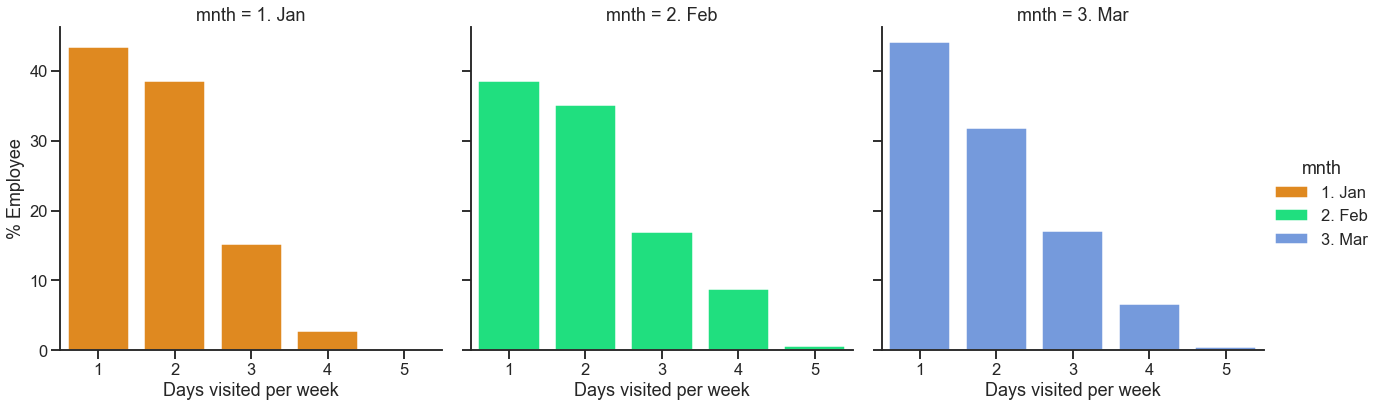

In [658]:

sns.set_context('talk')



j = sns.FacetGrid(avg_visit_dy_wk_2, size=6,  col = "mnth", hue = 'mnth', \
              palette = ['darkorange','springgreen','cornflowerblue']) \
   .map(sns.barplot,"avg_visit_dy_wk","emp_cnt_percent", ci = None, order=[1,2,3,4,5]) \
   .add_legend()
# plt.figure(figsize = (15,10))
j.set_xlabels('Days visited per week')
j.set_ylabels('% Employee')
# j.fig.suptitle('No of days visited per week')

plt.show()
# palette = ['darkorange','springgreen','cornflowerblue'])

### How many hours in a day does employee stays in office?

In [282]:
df_wkd.head()

,employee_id,observed_in_office_timestamp,date,time,mnth,day,yymmdd,yymm,mmdd,weekday,time_of_day,wom
7,72,2022-01-03 10:00:00,2022-01-03,10:00:00,1. Jan,3,20220103,202201,103,Mon,10,1
8,121,2022-01-03 10:00:00,2022-01-03,10:00:00,1. Jan,3,20220103,202201,103,Mon,10,1
9,72,2022-01-03 11:00:00,2022-01-03,11:00:00,1. Jan,3,20220103,202201,103,Mon,11,1
10,121,2022-01-03 11:00:00,2022-01-03,11:00:00,1. Jan,3,20220103,202201,103,Mon,11,1
11,72,2022-01-03 12:00:00,2022-01-03,12:00:00,1. Jan,3,20220103,202201,103,Mon,12,1


In [285]:
df_wkd_c = df_wkd.copy()

In [286]:
df_wkd_c['time_of_day'] = df_wkd_c['time_of_day'].astype(int)

In [288]:
df_stay_dur_agg = df_wkd_c.groupby(['employee_id','mnth','wom','date']). \
agg(max_time = pd.NamedAgg(column = 'time_of_day', aggfunc = max), \
    min_time = pd.NamedAgg(column = 'time_of_day', aggfunc = min), \
    hours_spent = pd.NamedAgg(column = 'time_of_day', aggfunc = lambda x : max(x) - min(x))).reset_index()
df_stay_dur_agg.shape
df_stay_dur_agg.head()

(3076, 7)

,employee_id,mnth,wom,date,max_time,min_time,hours_spent
0,1,1. Jan,2,2022-01-10,18,10,8
1,1,1. Jan,2,2022-01-13,18,10,8
2,1,1. Jan,3,2022-01-18,22,11,11
3,1,1. Jan,4,2022-01-24,16,11,5
4,1,1. Jan,4,2022-01-25,18,11,7


In [294]:
df_stay_dur_agg['rnk'] = df_stay_dur_agg.groupby(['employee_id','mnth','wom'])[['hours_spent']].rank(ascending = False, method = 'dense')
df_stay_dur_agg.head()

,employee_id,mnth,wom,date,max_time,min_time,hours_spent,rnk
0,1,1. Jan,2,2022-01-10,18,10,8,1.0
1,1,1. Jan,2,2022-01-13,18,10,8,1.0
2,1,1. Jan,3,2022-01-18,22,11,11,1.0
3,1,1. Jan,4,2022-01-24,16,11,5,3.0
4,1,1. Jan,4,2022-01-25,18,11,7,1.0


In [299]:
df_stay_dur_agg[df_stay_dur_agg['employee_id'] == 123].sort_values(by = ['mnth','wom','hours_spent'])

,employee_id,mnth,wom,date,max_time,min_time,hours_spent,rnk
1463,123,1. Jan,1,2022-01-07,17,11,6,3.0
1462,123,1. Jan,1,2022-01-06,18,11,7,2.0
1461,123,1. Jan,1,2022-01-04,18,10,8,1.0
1464,123,1. Jan,2,2022-01-10,18,11,7,3.0
1467,123,1. Jan,2,2022-01-13,18,11,7,3.0
1465,123,1. Jan,2,2022-01-11,19,11,8,2.0
1466,123,1. Jan,2,2022-01-12,19,10,9,1.0
1469,123,1. Jan,3,2022-01-20,18,14,4,2.0
1468,123,1. Jan,3,2022-01-18,18,12,6,1.0
1471,123,1. Jan,4,2022-01-25,18,11,7,2.0


In [300]:
len(df_stay_dur_agg.employee_id.unique())

267

In [301]:
df_stay_dur_agg_2 = df_stay_dur_agg[df_stay_dur_agg['rnk'] <= 3]

In [302]:
len(df_stay_dur_agg_2.employee_id.unique())

267

In [315]:
df_stay_dur_agg_3 = df_stay_dur_agg_2.groupby(['employee_id','mnth']).agg({'hours_spent':np.mean}).rename({'hours_spent':'avg_hours_a_day'}, axis = 1). \
reset_index()

In [316]:
df_stay_dur_agg_3.head()

,employee_id,mnth,avg_hours_a_day
0,1,1. Jan,7.571429
1,1,2. Feb,7.100000
2,1,3. Mar,10.375000
3,2,1. Jan,10.000000
4,2,2. Feb,8.909091


In [317]:
df_stay_dur_agg_3['Avg_hour_spent_day'] = ['0' if x == 0 else \
                                            '< 3' if x > 0 and x <= 3 else \
                                            '3 to 6' if x > 3 and x <=6 else \
                                            '6 to 9' if x > 6 and x <= 9 else \
                                            '> 9' if x > 9 else 'NA' for x in df_stay_dur_agg_3['avg_hours_a_day']]
df_stay_dur_agg_3.shape
df_stay_dur_agg_3.head()

(527, 4)

,employee_id,mnth,avg_hours_a_day,Avg_hour_spent_day
0,1,1. Jan,7.571429,6 to 9
1,1,2. Feb,7.100000,6 to 9
2,1,3. Mar,10.375000,> 9
3,2,1. Jan,10.000000,> 9
4,2,2. Feb,8.909091,6 to 9


In [318]:
df_stay_dur_agg_3['Avg_hour_spent_day'].value_counts()

6 to 9    283
3 to 6    114
< 3        61
> 9        53
0          16
Name: Avg_hour_spent_day, dtype: int64

In [320]:
df_stay_dur_agg_4 = df_stay_dur_agg_3.groupby(['mnth','Avg_hour_spent_day']).agg({'employee_id':pd.Series.nunique}). \
rename({'employee_id':'emp_cnt'}, axis = 1).reset_index()
df_stay_dur_agg_4.shape
df_stay_dur_agg_4.head()

(15, 3)

,mnth,Avg_hour_spent_day,emp_cnt
0,1. Jan,0,6
1,1. Jan,3 to 6,29
2,1. Jan,6 to 9,74
3,1. Jan,< 3,19
4,1. Jan,> 9,17


In [660]:
df_stay_dur_agg_4

,mnth,Avg_hour_spent_day,emp_cnt
0,1. Jan,0,6
1,1. Jan,3 to 6,29
2,1. Jan,6 to 9,74
3,1. Jan,< 3,19
4,1. Jan,> 9,17
5,2. Feb,0,4
6,2. Feb,3 to 6,41
7,2. Feb,6 to 9,92
8,2. Feb,< 3,20
9,2. Feb,> 9,14


In [661]:
df_stay_dur_agg_4['emp_cnt_percent'] = [np.round(x*100/211,1) if y == '3. Mar' else \
                                        np.round(x*100/171,1) if y == '2. Feb' else \
                                        np.round(x*100/145,1) \
                                        for x,y in zip(df_stay_dur_agg_4['emp_cnt'],df_stay_dur_agg_4['mnth'])]
df_stay_dur_agg_4

,mnth,Avg_hour_spent_day,emp_cnt,emp_cnt_percent
0,1. Jan,0,6,4.1
1,1. Jan,3 to 6,29,20.0
2,1. Jan,6 to 9,74,51.0
3,1. Jan,< 3,19,13.1
4,1. Jan,> 9,17,11.7
5,2. Feb,0,4,2.3
6,2. Feb,3 to 6,41,24.0
7,2. Feb,6 to 9,92,53.8
8,2. Feb,< 3,20,11.7
9,2. Feb,> 9,14,8.2


/Users/sagarbhavsar/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


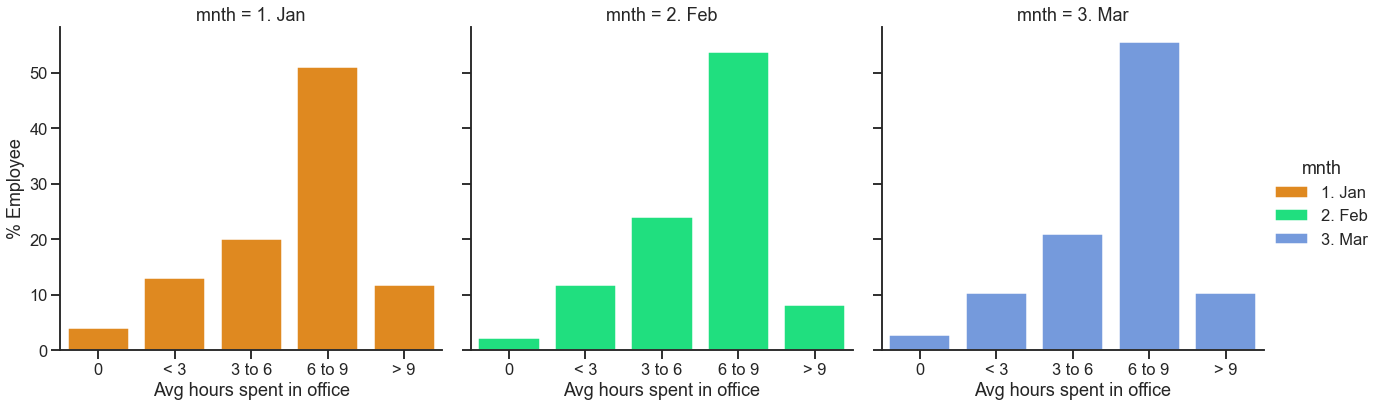

In [662]:
sns.set_context('talk')
k = sns.FacetGrid(df_stay_dur_agg_4, size=6,  col = "mnth", hue = 'mnth', \
              palette = ['darkorange','springgreen','cornflowerblue']) \
   .map(sns.barplot,"Avg_hour_spent_day","emp_cnt_percent", ci = None, order=['0','< 3','3 to 6','6 to 9','> 9']) \
   .add_legend()

k.set_xlabels('Avg hours spent in office')
k.set_ylabels('% Employee')

plt.show()
# palette = ['darkorange','springgreen','cornflowerblue'])

### What was the first month/day in office for employees

In [332]:
df_wkd.head()

,employee_id,observed_in_office_timestamp,date,time,mnth,day,yymmdd,yymm,mmdd,weekday,time_of_day,wom
7,72,2022-01-03 10:00:00,2022-01-03,10:00:00,1. Jan,3,20220103,202201,103,Mon,10,1
8,121,2022-01-03 10:00:00,2022-01-03,10:00:00,1. Jan,3,20220103,202201,103,Mon,10,1
9,72,2022-01-03 11:00:00,2022-01-03,11:00:00,1. Jan,3,20220103,202201,103,Mon,11,1
10,121,2022-01-03 11:00:00,2022-01-03,11:00:00,1. Jan,3,20220103,202201,103,Mon,11,1
11,72,2022-01-03 12:00:00,2022-01-03,12:00:00,1. Jan,3,20220103,202201,103,Mon,12,1


In [333]:
df_wkd_f = df_wkd.copy()

In [349]:
df_wkd_f['rnk'] = df_wkd_f.groupby(['employee_id'])[['observed_in_office_timestamp']].rank(ascending = True, method = 'min')

In [347]:
df_wkd_f.head()

,employee_id,observed_in_office_timestamp,date,time,mnth,day,yymmdd,yymm,mmdd,weekday,time_of_day,wom,rnk
7,72,2022-01-03 10:00:00,2022-01-03,10:00:00,1. Jan,3,20220103,202201,103,Mon,10,1,1.0
8,121,2022-01-03 10:00:00,2022-01-03,10:00:00,1. Jan,3,20220103,202201,103,Mon,10,1,1.0
9,72,2022-01-03 11:00:00,2022-01-03,11:00:00,1. Jan,3,20220103,202201,103,Mon,11,1,2.0
10,121,2022-01-03 11:00:00,2022-01-03,11:00:00,1. Jan,3,20220103,202201,103,Mon,11,1,2.0
11,72,2022-01-03 12:00:00,2022-01-03,12:00:00,1. Jan,3,20220103,202201,103,Mon,12,1,3.0


In [348]:
df_wkd_f[df_wkd_f['employee_id'] == 72]

,employee_id,observed_in_office_timestamp,date,time,mnth,day,yymmdd,yymm,mmdd,weekday,time_of_day,wom,rnk
7,72,2022-01-03 10:00:00,2022-01-03,10:00:00,1. Jan,3,20220103,202201,103,Mon,10,1,1.0
9,72,2022-01-03 11:00:00,2022-01-03,11:00:00,1. Jan,3,20220103,202201,103,Mon,11,1,2.0
11,72,2022-01-03 12:00:00,2022-01-03,12:00:00,1. Jan,3,20220103,202201,103,Mon,12,1,3.0
14,72,2022-01-03 13:00:00,2022-01-03,13:00:00,1. Jan,3,20220103,202201,103,Mon,13,1,4.0
21,72,2022-01-03 14:00:00,2022-01-03,14:00:00,1. Jan,3,20220103,202201,103,Mon,14,1,5.0
25,72,2022-01-03 15:00:00,2022-01-03,15:00:00,1. Jan,3,20220103,202201,103,Mon,15,1,6.0
37,72,2022-01-04 09:00:00,2022-01-04,09:00:00,1. Jan,4,20220104,202201,104,Tue,09,1,7.0
54,72,2022-01-04 10:00:00,2022-01-04,10:00:00,1. Jan,4,20220104,202201,104,Tue,10,1,8.0
66,72,2022-01-04 11:00:00,2022-01-04,11:00:00,1. Jan,4,20220104,202201,104,Tue,11,1,9.0
118,72,2022-01-04 12:00:00,2022-01-04,12:00:00,1. Jan,4,20220104,202201,104,Tue,12,1,10.0


In [350]:
df_wkd_f_2 = df_wkd_f[df_wkd_f['rnk'] == 1]
df_wkd_f_2.shape
df_wkd_f_2.head()

(267, 13)

,employee_id,observed_in_office_timestamp,date,time,mnth,day,yymmdd,yymm,mmdd,weekday,time_of_day,wom,rnk
7,72,2022-01-03 10:00:00,2022-01-03,10:00:00,1. Jan,3,20220103,202201,103,Mon,10,1,1.0
8,121,2022-01-03 10:00:00,2022-01-03,10:00:00,1. Jan,3,20220103,202201,103,Mon,10,1,1.0
13,102,2022-01-03 12:00:00,2022-01-03,12:00:00,1. Jan,3,20220103,202201,103,Mon,12,1,1.0
15,198,2022-01-03 13:00:00,2022-01-03,13:00:00,1. Jan,3,20220103,202201,103,Mon,13,1,1.0
16,153,2022-01-03 13:00:00,2022-01-03,13:00:00,1. Jan,3,20220103,202201,103,Mon,13,1,1.0


In [351]:
# what was the first month of joining/return to office

In [352]:
df_wkd_f_2.groupby('mnth').agg({'employee_id':pd.Series.nunique})

,employee_id
mnth,
1. Jan,145
2. Feb,60
3. Mar,62


In [354]:
# What was the first day of comming to office

In [355]:
df_wkd_f_2.groupby('weekday').agg({'employee_id':pd.Series.nunique})

,employee_id
weekday,
Fri,42
Mon,52
Thu,33
Tue,86
Wed,54


## Clustering

In [357]:
df_wkd.head()

,employee_id,observed_in_office_timestamp,date,time,mnth,day,yymmdd,yymm,mmdd,weekday,time_of_day,wom
7,72,2022-01-03 10:00:00,2022-01-03,10:00:00,1. Jan,3,20220103,202201,103,Mon,10,1
8,121,2022-01-03 10:00:00,2022-01-03,10:00:00,1. Jan,3,20220103,202201,103,Mon,10,1
9,72,2022-01-03 11:00:00,2022-01-03,11:00:00,1. Jan,3,20220103,202201,103,Mon,11,1
10,121,2022-01-03 11:00:00,2022-01-03,11:00:00,1. Jan,3,20220103,202201,103,Mon,11,1
11,72,2022-01-03 12:00:00,2022-01-03,12:00:00,1. Jan,3,20220103,202201,103,Mon,12,1


In [384]:
df_cust_lvl = pd.DataFrame({'employee_id':df_wkd['employee_id'].unique()})
df_cust_lvl.shape
df_cust_lvl.head()

(267, 1)

,employee_id
0,72
1,121
2,102
3,198
4,153


In [ ]:
df_wkd.groupby(['employee_id','mnth'])

In [371]:
# df_emp_agg.head()
df_emp_agg_visit_2 = df_emp_agg.groupby(['employee_id','mnth']).agg({'no_of_days_visit':np.mean}).rename({'no_of_days_visit':'avg_days_pr_wk'}, axis = 1).reset_index()
df_emp_agg_visit_2.head()

,employee_id,mnth,avg_days_pr_wk
0,1,1. Jan,1.75
1,1,2. Feb,3.25
2,1,3. Mar,1.80
3,2,1. Jan,1.00
4,2,2. Feb,2.75


In [374]:
df_emp_agg_visit_3 = df_emp_agg_visit_2[df_emp_agg_visit_2['mnth'] == '2. Feb'][['employee_id','avg_days_pr_wk']] \
.rename({'avg_days_pr_wk':'avg_days_pr_wk_feb'}, axis = 1)
df_emp_agg_visit_3.shape
df_emp_agg_visit_3.head()

(171, 2)

,employee_id,avg_days_pr_wk_feb
1,1,3.25
4,2,2.75
7,3,2.00
11,6,2.50
14,8,3.00


In [375]:
df_emp_agg_visit_4 = df_emp_agg_visit_2[df_emp_agg_visit_2['mnth'] == '3. Mar'][['employee_id','avg_days_pr_wk']] \
.rename({'avg_days_pr_wk':'avg_days_pr_wk_mar'}, axis = 1)
df_emp_agg_visit_4.shape
df_emp_agg_visit_4.head()

(211, 2)

,employee_id,avg_days_pr_wk_mar
2,1,1.8
5,2,1.6
9,5,1.5
12,6,1.0
15,8,3.0


In [385]:
# joining feb & mar variables
df_cust_lvl = df_cust_lvl.merge(df_emp_agg_visit_3, on = 'employee_id', how = 'left')
# df_cust_lvl = df_cust_lvl.merge(df_emp_agg_visit_4, on = 'employee_id', how = 'left')
df_cust_lvl.shape

df_cust_lvl.head()

(267, 2)

,employee_id,avg_days_pr_wk_feb
0,72,2.5
1,121,3.0
2,102,2.0
3,198,NaN
4,153,2.5


In [386]:
df_cust_lvl = df_cust_lvl.merge(df_emp_agg_visit_4, on = 'employee_id', how = 'left')
df_cust_lvl.shape
df_cust_lvl.head()

(267, 3)

,employee_id,avg_days_pr_wk_feb,avg_days_pr_wk_mar
0,72,2.5,3.6
1,121,3.0,3.6
2,102,2.0,2.6
3,198,NaN,NaN
4,153,2.5,1.0


In [387]:
df_cust_lvl['avg_days_pr_wk_feb'].fillna(0, inplace = True)
df_cust_lvl['avg_days_pr_wk_mar'].fillna(0, inplace = True)

In [389]:
df_cust_lvl.shape
df_cust_lvl.head()

(267, 3)

,employee_id,avg_days_pr_wk_feb,avg_days_pr_wk_mar
0,72,2.5,3.6
1,121,3.0,3.6
2,102,2.0,2.6
3,198,0.0,0.0
4,153,2.5,1.0


In [ ]:
# varible for average hours spent in a day for Feb & Mar month

In [390]:
df_stay_dur_agg_3.head(2)

,employee_id,mnth,avg_hours_a_day,Avg_hour_spent_day
0,1,1. Jan,7.571429,6 to 9
1,1,2. Feb,7.100000,6 to 9


In [392]:
df_clust_stay_dur_agg_3 = df_stay_dur_agg_3[df_stay_dur_agg_3['mnth'] == '2. Feb'][['employee_id','avg_hours_a_day']]. \
rename({'avg_hours_a_day':'avg_hours_a_day_feb'}, axis = 1)
df_clust_stay_dur_agg_3.shape

(171, 2)

In [393]:
df_clust_stay_dur_agg_4 = df_stay_dur_agg_3[df_stay_dur_agg_3['mnth'] == '3. Mar'][['employee_id','avg_hours_a_day']]. \
rename({'avg_hours_a_day':'avg_hours_a_day_mar'}, axis = 1)
df_clust_stay_dur_agg_4.shape

(211, 2)

In [395]:
df_cust_lvl = df_cust_lvl.merge(df_clust_stay_dur_agg_3, on = 'employee_id', how = 'left')
df_cust_lvl.shape
df_cust_lvl.head()

(267, 4)

,employee_id,avg_days_pr_wk_feb,avg_days_pr_wk_mar,avg_hours_a_day_feb
0,72,2.5,3.6,7.000000
1,121,3.0,3.6,6.666667
2,102,2.0,2.6,6.625000
3,198,0.0,0.0,NaN
4,153,2.5,1.0,6.000000


In [396]:
df_cust_lvl = df_cust_lvl.merge(df_clust_stay_dur_agg_4, on = 'employee_id', how = 'left')
df_cust_lvl.shape
df_cust_lvl.head()

(267, 5)

,employee_id,avg_days_pr_wk_feb,avg_days_pr_wk_mar,avg_hours_a_day_feb,avg_hours_a_day_mar
0,72,2.5,3.6,7.000000,6.588235
1,121,3.0,3.6,6.666667,6.588235
2,102,2.0,2.6,6.625000,6.846154
3,198,0.0,0.0,NaN,NaN
4,153,2.5,1.0,6.000000,8.000000


In [397]:
df_cust_lvl['avg_hours_a_day_feb'].fillna(0, inplace = True)
df_cust_lvl['avg_hours_a_day_mar'].fillna(0, inplace = True)
df_cust_lvl.head()

,employee_id,avg_days_pr_wk_feb,avg_days_pr_wk_mar,avg_hours_a_day_feb,avg_hours_a_day_mar
0,72,2.5,3.6,7.000000,6.588235
1,121,3.0,3.6,6.666667,6.588235
2,102,2.0,2.6,6.625000,6.846154
3,198,0.0,0.0,0.000000,0.000000
4,153,2.5,1.0,6.000000,8.000000


In [398]:
df_cust_day_of_wk = df_wkd[['employee_id','mnth','date','weekday']].drop_duplicates()
df_cust_day_of_wk.shape

(3076, 4)

In [403]:
df_cust_day_of_wk_2 = df_cust_day_of_wk.groupby(['employee_id','mnth','weekday']).agg({'date':'count'}). \
rename({'date':'no_visit'}, axis = 1).reset_index()
df_cust_day_of_wk_2.head()
# agg(no_visit_mon = pd.NamedAgg(column = 'time_of_day', aggfunc = max)

,employee_id,mnth,weekday,no_visit
0,1,1. Jan,Mon,3
1,1,1. Jan,Thu,2
2,1,1. Jan,Tue,2
3,1,2. Feb,Fri,2
4,1,2. Feb,Mon,3


In [412]:
df_cust_day_of_wk_2.shape

(1546, 4)

In [431]:
df_cust_day_of_wk_3_feb = df_cust_day_of_wk_2[df_cust_day_of_wk_2['mnth'] == '2. Feb'][['employee_id','weekday','no_visit']] \
.pivot_table(index = 'employee_id', columns='weekday', values = 'no_visit', aggfunc = 'first').reset_index()
df_cust_day_of_wk_3_feb.head()

weekday,employee_id,Fri,Mon,Thu,Tue,Wed
0,1,2.0,3.0,1.0,3.0,4.0
1,2,1.0,2.0,3.0,3.0,2.0
2,3,NaN,1.0,NaN,2.0,1.0
3,6,3.0,3.0,NaN,NaN,4.0
4,8,NaN,NaN,1.0,1.0,1.0


In [432]:
df_cust_day_of_wk_3_mar = df_cust_day_of_wk_2[df_cust_day_of_wk_2['mnth'] == '3. Mar'][['employee_id','weekday','no_visit']] \
.pivot_table(index = 'employee_id', columns='weekday', values = 'no_visit', aggfunc = 'first').reset_index()
df_cust_day_of_wk_3_mar.head()

weekday,employee_id,Fri,Mon,Thu,Tue,Wed
0,1,1.0,2.0,2.0,2.0,2.0
1,2,NaN,2.0,2.0,3.0,1.0
2,5,NaN,1.0,NaN,1.0,1.0
3,6,NaN,NaN,1.0,1.0,NaN
4,8,1.0,1.0,3.0,3.0,4.0


In [433]:
df_cust_day_of_wk_3_feb.fillna(0, inplace = True)
df_cust_day_of_wk_3_mar.fillna(0, inplace = True)

In [438]:
df_cust_lvl = df_cust_lvl.merge(df_cust_day_of_wk_3_feb, on = 'employee_id', how = 'left')
df_cust_lvl.shape
df_cust_lvl.head()

(267, 10)

,employee_id,avg_days_pr_wk_feb,avg_days_pr_wk_mar,avg_hours_a_day_feb,avg_hours_a_day_mar,Fri,Mon,Thu,Tue,Wed
0,72,2.5,3.6,7.000000,6.588235,0.0,3.0,4.0,2.0,1.0
1,121,3.0,3.6,6.666667,6.588235,0.0,3.0,4.0,4.0,1.0
2,102,2.0,2.6,6.625000,6.846154,0.0,3.0,1.0,3.0,1.0
3,198,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
4,153,2.5,1.0,6.000000,8.000000,2.0,2.0,2.0,4.0,0.0


In [439]:
df_cust_lvl = df_cust_lvl.merge(df_cust_day_of_wk_3_mar, on = 'employee_id', how = 'left', \
                                     suffixes = ('_feb','_mar'))
df_cust_lvl.head()

,employee_id,avg_days_pr_wk_feb,avg_days_pr_wk_mar,avg_hours_a_day_feb,avg_hours_a_day_mar,Fri_feb,Mon_feb,Thu_feb,Tue_feb,Wed_feb,Fri_mar,Mon_mar,Thu_mar,Tue_mar,Wed_mar
0,72,2.5,3.6,7.000000,6.588235,0.0,3.0,4.0,2.0,1.0,3.0,3.0,4.0,5.0,3.0
1,121,3.0,3.6,6.666667,6.588235,0.0,3.0,4.0,4.0,1.0,3.0,3.0,4.0,5.0,3.0
2,102,2.0,2.6,6.625000,6.846154,0.0,3.0,1.0,3.0,1.0,1.0,2.0,3.0,2.0,5.0
3,198,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,153,2.5,1.0,6.000000,8.000000,2.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0


In [440]:
df_cust_lvl_t.shape

(267, 15)

In [443]:
df_cust_lvl.fillna(0, inplace = True)

In [448]:
df_cust_lvl['Fri_visits'] = df_cust_lvl[['Fri_feb','Fri_mar']].mean(axis = 1)
df_cust_lvl['Thu_visits'] = df_cust_lvl[['Thu_feb','Thu_mar']].mean(axis = 1)
df_cust_lvl['Wed_visits'] = df_cust_lvl[['Wed_feb','Wed_mar']].mean(axis = 1)
df_cust_lvl['Tue_visits'] = df_cust_lvl[['Tue_feb','Tue_mar']].mean(axis = 1)
df_cust_lvl['Mon_visits'] = df_cust_lvl[['Mon_feb','Mon_mar']].mean(axis = 1)
df_cust_lvl.head()

,employee_id,avg_days_pr_wk_feb,avg_days_pr_wk_mar,avg_hours_a_day_feb,avg_hours_a_day_mar,Fri_feb,Mon_feb,Thu_feb,Tue_feb,Wed_feb,Fri_mar,Mon_mar,Thu_mar,Tue_mar,Wed_mar,Fri_visits,Thu_visits,Wed_visits,Tue_visits,Mon_visits
0,72,2.5,3.6,7.000000,6.588235,0.0,3.0,4.0,2.0,1.0,3.0,3.0,4.0,5.0,3.0,1.5,4.0,2.0,3.5,3.0
1,121,3.0,3.6,6.666667,6.588235,0.0,3.0,4.0,4.0,1.0,3.0,3.0,4.0,5.0,3.0,1.5,4.0,2.0,4.5,3.0
2,102,2.0,2.6,6.625000,6.846154,0.0,3.0,1.0,3.0,1.0,1.0,2.0,3.0,2.0,5.0,0.5,2.0,3.0,2.5,2.5
3,198,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,153,2.5,1.0,6.000000,8.000000,2.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.5,2.0,1.0


In [450]:
df_cust_lvl.drop(columns = ['Fri_feb','Mon_feb','Thu_feb','Tue_feb','Wed_feb','Fri_mar','Mon_mar','Thu_mar','Tue_mar','Wed_mar'], inplace = True)

In [451]:
df_cust_lvl.head()

,employee_id,avg_days_pr_wk_feb,avg_days_pr_wk_mar,avg_hours_a_day_feb,avg_hours_a_day_mar,Fri_visits,Thu_visits,Wed_visits,Tue_visits,Mon_visits
0,72,2.5,3.6,7.000000,6.588235,1.5,4.0,2.0,3.5,3.0
1,121,3.0,3.6,6.666667,6.588235,1.5,4.0,2.0,4.5,3.0
2,102,2.0,2.6,6.625000,6.846154,0.5,2.0,3.0,2.5,2.5
3,198,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,153,2.5,1.0,6.000000,8.000000,1.0,1.0,0.5,2.0,1.0


In [476]:
df_cust_lvl.describe(percentiles=[0.05,0.1,0.2,0.3,0.5,0.6,0.75,0.85,0.9,0.95,0.99])

,employee_id,avg_days_pr_wk_feb,avg_days_pr_wk_mar,avg_hours_a_day_feb,avg_hours_a_day_mar,Fri_visits,Thu_visits,Wed_visits,Tue_visits,Mon_visits
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,134.741573,1.274032,1.444757,4.067233,5.210389,0.593633,0.895131,1.043071,1.095506,0.754682
std,77.553551,1.236337,1.113773,3.681941,3.513673,0.832062,1.094353,1.170204,1.264487,1.013409
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,14.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,27.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,54.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30%,81.800000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,135.000000,1.000000,1.000000,4.833333,6.428571,0.500000,0.500000,0.500000,0.500000,0.500000
60%,161.600000,1.333333,1.500000,6.000000,7.080000,0.500000,0.500000,1.000000,1.000000,0.500000


In [457]:
df_cust_lvl_c = df_cust_lvl.copy()

In [475]:
# Outlier capping
for col in df_cust_lvl[['avg_hours_a_day_feb','avg_hours_a_day_mar']].columns:
    percentiles = df_cust_lvl[col].quantile([0.99]).values
    df_cust_lvl[col][df_cust_lvl[col] > percentiles[0]] = percentiles[0]
    print(percentiles)
    
#     df_numeric[col] = np.clip(df_numeric[col], percentiles[0], percentiles[1])

[11.971]
[11.68]


/Users/sagarbhavsar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [518]:
df_cust_lvl_2 = df_cust_lvl.copy()

In [519]:
df_cust_lvl_2['avg_hours_a_day'] = df_cust_lvl_2[['avg_hours_a_day_feb','avg_hours_a_day_mar']].mean(axis = 1)
df_cust_lvl_2['avg_days_pr_wk'] = df_cust_lvl_2[['avg_days_pr_wk_feb','avg_days_pr_wk_mar']].mean(axis = 1)
df_cust_lvl_2['mid_wk_visits'] = df_cust_lvl_2[['Tue_visits','Wed_visits']].mean(axis = 1)
df_cust_lvl_2['end_wk_visits'] = df_cust_lvl_2[['Thu_visits','Fri_visits']].mean(axis = 1)
df_cust_lvl_2.drop(columns = \
                   ['avg_days_pr_wk_feb','avg_days_pr_wk_mar','avg_hours_a_day_feb', \
                    'avg_hours_a_day_mar','Fri_visits','Thu_visits','Wed_visits','Tue_visits'], inplace = True)
df_cust_lvl_2.head()

,employee_id,Mon_visits,avg_hours_a_day,avg_days_pr_wk,mid_wk_visits,end_wk_visits
0,72,3.0,6.794118,3.05,2.75,2.75
1,121,3.0,6.627451,3.30,3.25,2.75
2,102,2.5,6.735577,2.30,2.75,1.25
3,198,0.0,0.000000,0.00,0.00,0.00
4,153,1.0,7.000000,1.75,1.25,1.00


In [520]:
from sklearn.preprocessing import MinMaxScaler

df_cust_lvl_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df_cust_lvl_2.loc[:,df_cust_lvl_2.columns != 'employee_id']),columns = df_cust_lvl_2.columns[df_cust_lvl_2.columns != 'employee_id'])
df_cust_lvl_scaled.shape
df_cust_lvl_scaled.head()

(267, 5)

,Mon_visits,avg_hours_a_day,avg_days_pr_wk,mid_wk_visits,end_wk_visits
0,0.857143,0.670802,0.647788,0.611111,0.785714
1,0.857143,0.654346,0.700885,0.722222,0.785714
2,0.714286,0.665022,0.488496,0.611111,0.357143
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.285714,0.691129,0.371681,0.277778,0.285714


In [521]:
from sklearn.cluster import KMeans

In [522]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6]
# ,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(df_cust_lvl_scaled)#On random sample 1lack data
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(df_cust_lvl_scaled, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

/Users/sagarbhavsar/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Elbow method')

Text(0.5, 0, 'number of clusters')

Text(0, 0.5, 'clusters inertia')

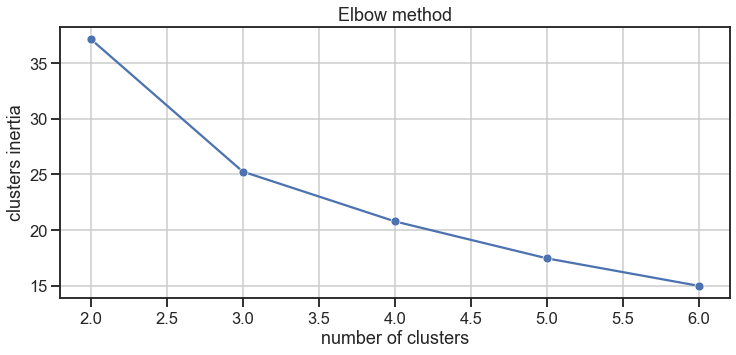

In [523]:
#ELBOW CURVE 
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
# ax.axvline(5, ls="--", c="red")
# ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

#The curve is showing 5, 6 clusters, we are going with 6 clusters

In [484]:
 # 4 clusters seems appropriate

In [524]:
kmeans=KMeans(n_clusters= 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) 
y_kmeans = kmeans.fit_predict(df_cust_lvl_scaled)

In [525]:
df_cust_lvl_2['clust_label'] = y_kmeans
df_cust_lvl_2.head()

,employee_id,Mon_visits,avg_hours_a_day,avg_days_pr_wk,mid_wk_visits,end_wk_visits,clust_label
0,72,3.0,6.794118,3.05,2.75,2.75,1
1,121,3.0,6.627451,3.30,3.25,2.75,1
2,102,2.5,6.735577,2.30,2.75,1.25,1
3,198,0.0,0.000000,0.00,0.00,0.00,0
4,153,1.0,7.000000,1.75,1.25,1.00,2


In [663]:
df_cust_lvl_2['clust_label'].value_counts()
df_cust_lvl_2['clust_label'].value_counts(normalize = True)

0    126
2     80
1     61
Name: clust_label, dtype: int64

0    0.471910
2    0.299625
1    0.228464
Name: clust_label, dtype: float64

In [527]:
df_cust_lvl_2.groupby('clust_label').mean()

,employee_id,Mon_visits,avg_hours_a_day,avg_days_pr_wk,mid_wk_visits,end_wk_visits
clust_label,,,,,,
0,130.333333,0.091270,2.050176,0.528439,0.224206,0.125000
1,134.475410,2.237705,7.538246,2.891393,2.766393,2.057377
2,141.887500,0.668750,6.505094,1.500000,1.106250,0.718750


In [ ]:
Cluster 0 -> Rare
Cluster 1 -> Regular
Cluster 2 -> infrequent

In [ ]:
# --------------------------------------------------------------------------------

In [45]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)